# Treadmill Buyer Profile



## Assignment
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Data Description
The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

 - Product - product purchased: KP281, KP481, or KP781
 - Age - in years
 - Gender - male/female
 - Education - in years
 - MaritalStatus - single or partnered
 - Usage - the average number of times the customer plans to use the treadmill each week
 - Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
 - Income - annual income in US dollars
 - Miles - the average number of miles the customer expects to walk/run each week

## Practicalities
Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1Ydzh4PkLb81RDgMd_FpSdM-FvBhkkeIx?usp=sharing"> Click here </a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

file_path = 'aerofit_treadmill_data.csv'
data = pd.read_csv(file_path)

data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:

data.info()


data.describe()


data['Product'].unique()
data['Gender'].unique()
data['MaritalStatus'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


array(['Single', 'Partnered'], dtype=object)

In [5]:
# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Partnered': 1})

# statistics for each treadmill product
product_groups = data.groupby('Product')

# statistics for each product
product_stats = product_groups.describe()
print(product_stats)

          Age                                                  Gender  \
        count   mean       std   min    25%   50%    75%   max  count   
Product                                                                 
KP281    80.0  28.55  7.221452  18.0  23.00  26.0  33.00  50.0   80.0   
KP481    60.0  28.90  6.645248  19.0  24.00  26.0  33.25  48.0   60.0   
KP781    40.0  29.10  6.971738  22.0  24.75  27.0  30.25  48.0   40.0   

                   ...   Income           Miles                               \
             mean  ...      75%       max count        mean        std   min   
Product            ...                                                         
KP281    0.500000  ...  53439.0   68220.0  80.0   82.787500  28.874102  38.0   
KP481    0.483333  ...  53439.0   67083.0  60.0   87.933333  33.263135  21.0   
KP781    0.175000  ...  90886.0  104581.0  40.0  166.900000  60.066544  80.0   

                                     
           25%    50%    75%    max  
Prod

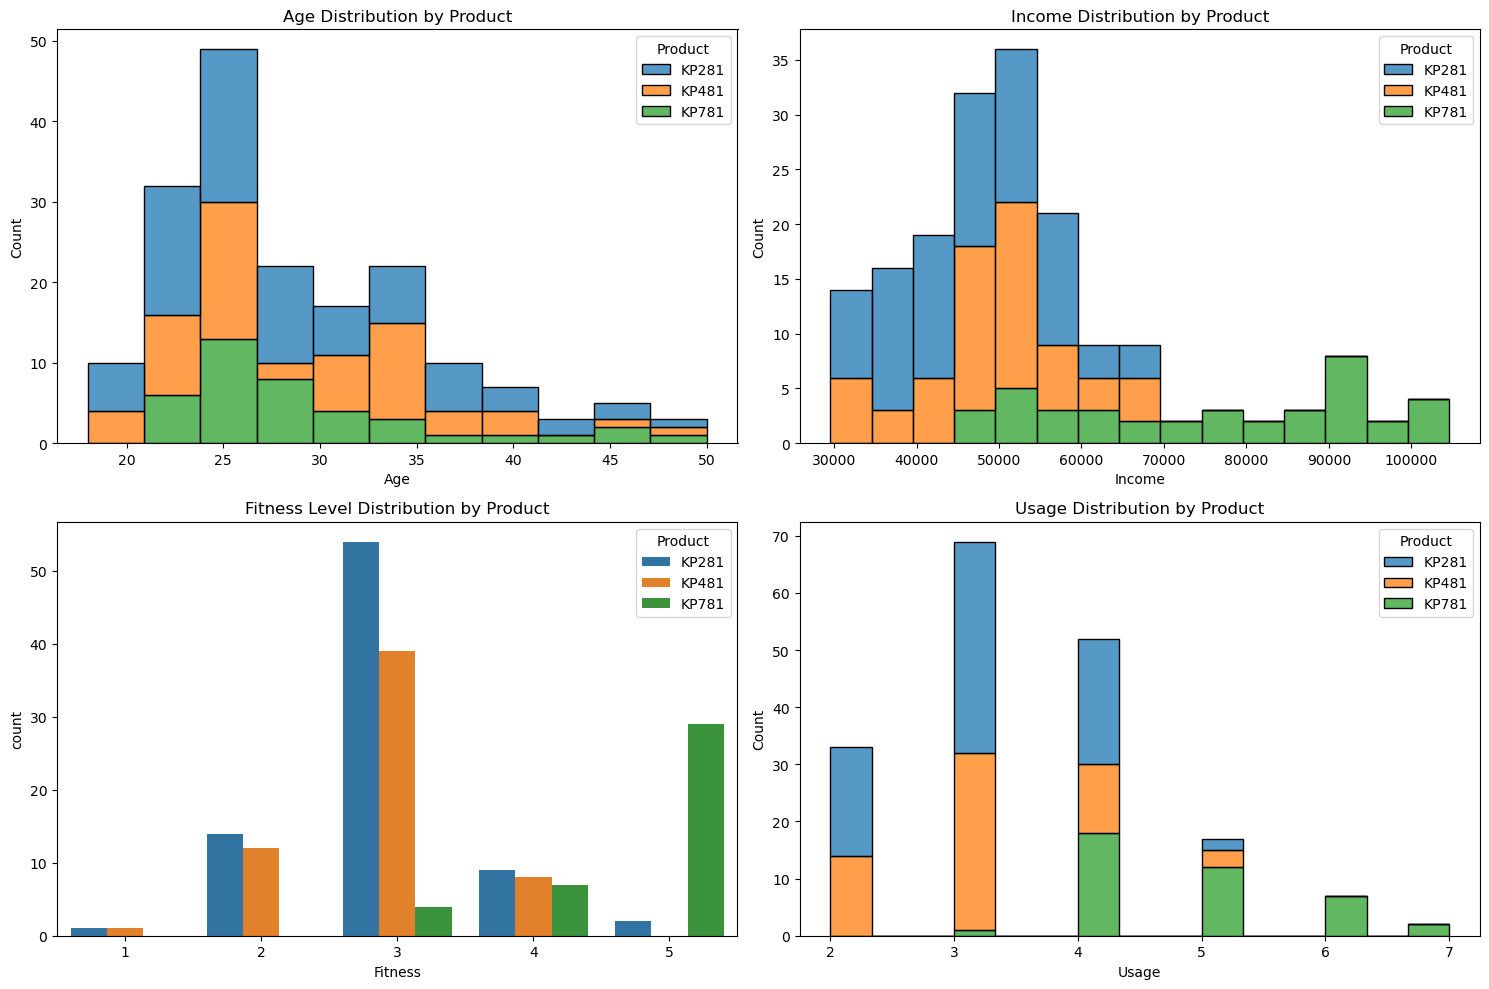

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Age', hue='Product', multiple='stack')
plt.title('Age Distribution by Product')

# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Income', hue='Product', multiple='stack')
plt.title('Income Distribution by Product')

# Fitness level distribution
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Fitness', hue='Product')
plt.title('Fitness Level Distribution by Product')

# Usage distribution
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='Usage', hue='Product', multiple='stack')
plt.title('Usage Distribution by Product')

plt.tight_layout()
plt.show()

In [7]:
# Two-way contingency tables
age_product_ct = pd.crosstab(data['Age'], data['Product'])
gender_product_ct = pd.crosstab(data['Gender'], data['Product'])
education_product_ct = pd.crosstab(data['Education'], data['Product'])
maritalstatus_product_ct = pd.crosstab(data['MaritalStatus'], data['Product'])
fitness_product_ct = pd.crosstab(data['Fitness'], data['Product'])

# Display the contingency tables
print("Age vs Product Contingency Table:\n", age_product_ct)
print("\nGender vs Product Contingency Table:\n", gender_product_ct)
print("\nEducation vs Product Contingency Table:\n", education_product_ct)
print("\nMarital Status vs Product Contingency Table:\n", maritalstatus_product_ct)
print("\nFitness vs Product Contingency Table:\n", fitness_product_ct)


Age vs Product Contingency Table:
 Product  KP281  KP481  KP781
Age                         
18           1      0      0
19           3      1      0
20           2      3      0
21           4      3      0
22           4      0      3
23           8      7      3
24           5      3      4
25           7     11      7
26           7      3      2
27           3      1      3
28           6      0      3
29           3      1      2
30           2      2      3
31           2      3      1
32           2      2      0
33           2      5      1
34           2      3      1
35           3      4      1
36           1      0      0
37           1      1      0
38           4      2      1
39           1      0      0
40           1      3      1
41           1      0      0
42           0      0      1
43           1      0      0
44           1      0      0
45           0      1      1
46           1      0      0
47           1      0      1
48           0      1      1
50      

In [11]:
# Compute conditional probabilities
age_product_cond = age_product_ct.div(age_product_ct.sum(axis=1), axis=0)
gender_product_cond = gender_product_ct.div(gender_product_ct.sum(axis=1), axis=0)
education_product_cond = education_product_ct.div(education_product_ct.sum(axis=1), axis=0)
maritalstatus_product_cond = maritalstatus_product_ct.div(maritalstatus_product_ct.sum(axis=1), axis=0)
fitness_product_cond = fitness_product_ct.div(fitness_product_ct.sum(axis=1), axis=0)

# Display conditional probabilities
age_product_cond
gender_product_cond
education_product_cond
maritalstatus_product_cond
fitness_product_cond

# Compute marginal probabilities
product_marginal = data['Product'].value_counts(normalize=True)
age_marginal = data['Age'].value_counts(normalize=True)
gender_marginal = data['Gender'].value_counts(normalize=True)
education_marginal = data['Education'].value_counts(normalize=True)
maritalstatus_marginal = data['MaritalStatus'].value_counts(normalize=True)
fitness_marginal = data['Fitness'].value_counts(normalize=True)

# Display marginal probabilities
product_marginal
age_marginal
gender_marginal
education_marginal
maritalstatus_marginal
fitness_marginal


Fitness
3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: proportion, dtype: float64

In [12]:
# Insights and recommendations
# For each product, summarize the key characteristics of the target audience and provide business insights.

# Example for KP281
kp281 = data[data['Product'] == 'KP281']
kp281_summary = kp281.describe()

print("KP281 Summary:")
print(kp281_summary)


KP281 Summary:
             Age  Gender  Education  MaritalStatus      Usage   Fitness  \
count  80.000000     0.0  80.000000            0.0  80.000000  80.00000   
mean   28.550000     NaN  15.037500            NaN   3.087500   2.96250   
std     7.221452     NaN   1.216383            NaN   0.782624   0.66454   
min    18.000000     NaN  12.000000            NaN   2.000000   1.00000   
25%    23.000000     NaN  14.000000            NaN   3.000000   3.00000   
50%    26.000000     NaN  16.000000            NaN   3.000000   3.00000   
75%    33.000000     NaN  16.000000            NaN   4.000000   3.00000   
max    50.000000     NaN  18.000000            NaN   5.000000   5.00000   

            Income       Miles  
count     80.00000   80.000000  
mean   46418.02500   82.787500  
std     9075.78319   28.874102  
min    29562.00000   38.000000  
25%    38658.00000   66.000000  
50%    46617.00000   85.000000  
75%    53439.00000   94.000000  
max    68220.00000  188.000000  
